<a href="https://colab.research.google.com/github/sanalpillai/Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/blob/main/Data_Cleaning_Feature_Selection_Modeling_and_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#!pip install --upgrade shap
#!pip install h2o
#!pip install xgboost
#!pip install eli5
#!pip install datasist

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [27]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/sanalpillai/Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/main/Dataset/cleaned_data_cirrhosis.csv"
data = pd.read_csv(data_url, index_col=0)

In [28]:
data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [29]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [30]:
# Replace 'CL' with 'C' in the 'Status' column and 'S' with 'Y' in the 'Edema' column
data['Status'] = data['Status'].replace({'CL': 'C'})
data['Edema'] = data['Edema'].replace({'S': 'Y'})

In [31]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,Y,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,Y,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,C,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [32]:
import pandas as pd

# Count the number of NaNs in each column
nan_counts = data.isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

# To only display columns that contain NaNs:
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
Series([], dtype: int64)


In [33]:
data.corr()

<ipython-input-33-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.125934,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.147495,-0.110685,-0.362013
Age,-0.125934,1.000000,0.002362,-0.145054,-0.182350,0.034519,-0.060708,-0.139050,0.002323,-0.145948,0.113916,0.187852
Bilirubin,-0.403953,0.002362,1.000000,0.336882,-0.314177,0.403761,0.104675,0.392112,0.370330,-0.013347,0.312007,0.200314
Cholesterol,-0.099322,-0.145054,0.336882,1.000000,-0.043022,0.145910,0.157995,0.347222,0.291750,0.158641,-0.027259,0.009930
Albumin,0.430829,-0.182350,-0.314177,-0.043022,1.000000,-0.209024,-0.070010,-0.180947,-0.068509,0.156384,-0.198405,-0.302190
Copper,-0.295723,0.034519,0.403761,0.145910,-0.209024,1.000000,0.207349,0.298923,0.292236,-0.040523,0.182494,0.232149
Alk_Phos,0.152368,-0.060708,0.104675,0.157995,-0.070010,0.207349,1.000000,0.122071,0.186250,0.133398,0.073408,0.037905
SGOT,-0.187930,-0.139050,0.392112,0.347222,-0.180947,0.298923,0.122071,1.000000,0.130853,-0.094383,0.094550,0.143568
Tryglicerides,-0.111453,0.002323,0.370330,0.291750,-0.068509,0.292236,0.186250,0.130853,1.000000,0.088806,0.014831,0.099879
Platelets,0.147495,-0.145948,-0.013347,0.158641,0.156384,-0.040523,0.133398,-0.094383,0.088806,1.000000,-0.154617,-0.240671


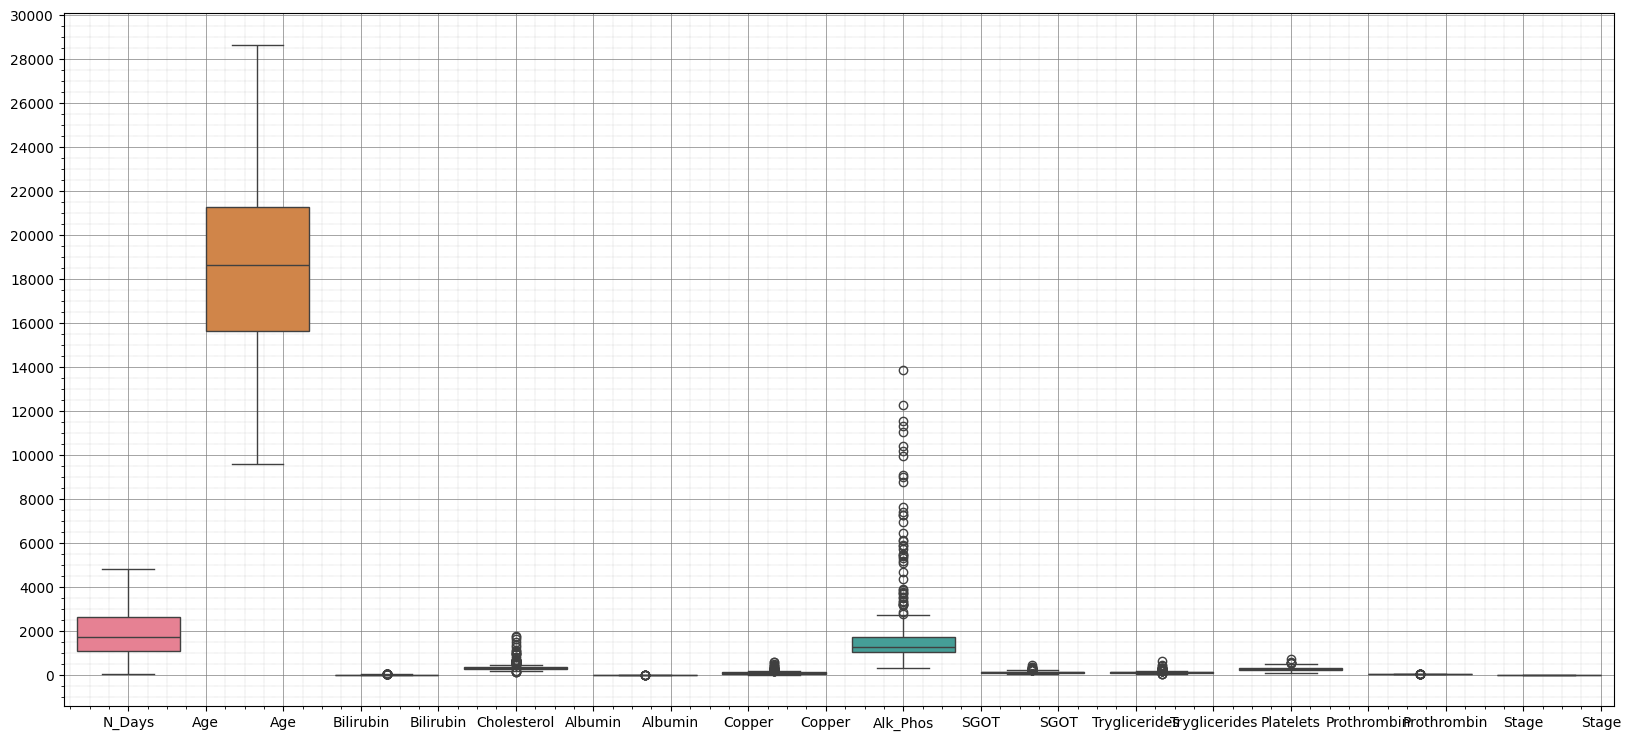

In [34]:
# Boxplot to visualize distributions and spot outliers
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

# Set major and minor ticks on both axes
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Set major x ticks to be more frequent
ax.yaxis.set_major_locator(plt.MaxNLocator(20))  # Set major y ticks to be more frequent

# Add gridlines and specify the grid for minor ticks as well
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.25)
plt.minorticks_on()  # Turn on minor ticks

plt.show()


In [35]:
#Making categories to 0 & 1
data["Status"] = data["Status"].map({"D": 0, "C": 1})
data["Drug"] = data["Drug"].map({"D-penicillamine": 0, "Placebo": 1})
data["Sex"] = data["Sex"].map({"F": 0, "M": 1})
data["Ascites"] = data["Ascites"].map({"N": 0, "Y": 1})
data["Hepatomegaly"] = data["Hepatomegaly"].map({"N": 0, "Y": 1})
data["Spiders"] = data["Spiders"].map({"N": 0, "Y": 1})
data["Edema"] = data["Edema"].map({"N": 0, "Y": 1})

# Viewing data
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,0,0,21464,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,1,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,0,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,0,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [36]:
# Creating binary vaiables
data = pd.get_dummies(data)

# Normalizing the data in the columns

from sklearn import preprocessing

# Create variables to store scaled values as floats
a = data[["N_Days"]].values.astype(float)
b = data[["Age"]].values.astype(float)
c = data[["Bilirubin"]].values.astype(float)
d = data[["Cholesterol"]].values.astype(float)
e = data[["Albumin"]].values.astype(float)
f = data[["Copper"]].values.astype(float)
g = data[["Alk_Phos"]].values.astype(float)
h = data[["SGOT"]].values.astype(float)
i = data[["Tryglicerides"]].values.astype(float)
j = data[["Platelets"]].values.astype(float)
k = data[["Prothrombin"]].values.astype(float)
l = data[["Stage"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)
e_scaled = min_max_scaler.fit_transform(e)
f_scaled = min_max_scaler.fit_transform(f)
g_scaled = min_max_scaler.fit_transform(g)
h_scaled = min_max_scaler.fit_transform(h)
i_scaled = min_max_scaler.fit_transform(i)
j_scaled = min_max_scaler.fit_transform(j)
k_scaled = min_max_scaler.fit_transform(k)
l_scaled = min_max_scaler.fit_transform(l)

# Run the normalizer on the dataframe
data[["N_Days"]] = pd.DataFrame(a_scaled)
data[["Age"]] = pd.DataFrame(b_scaled)
data[["Bilirubin"]] = pd.DataFrame(c_scaled)
data[["Cholesterol"]] = pd.DataFrame(d_scaled)
data[["Albumin"]] = pd.DataFrame(e_scaled)
data[["Copper"]] = pd.DataFrame(f_scaled)
data[["Alk_Phos"]] = pd.DataFrame(g_scaled)
data[["SGOT"]] = pd.DataFrame(h_scaled)
data[["Tryglicerides"]] = pd.DataFrame(i_scaled)
data[["Platelets"]] = pd.DataFrame(j_scaled)
data[["Prothrombin"]] = pd.DataFrame(k_scaled)
data[["Stage"]] = pd.DataFrame(l_scaled)

# Handling NaNs by filling them with the mean of each column
data = data.fillna(data.mean())

**Exploratory Data Analysis (EDA)**

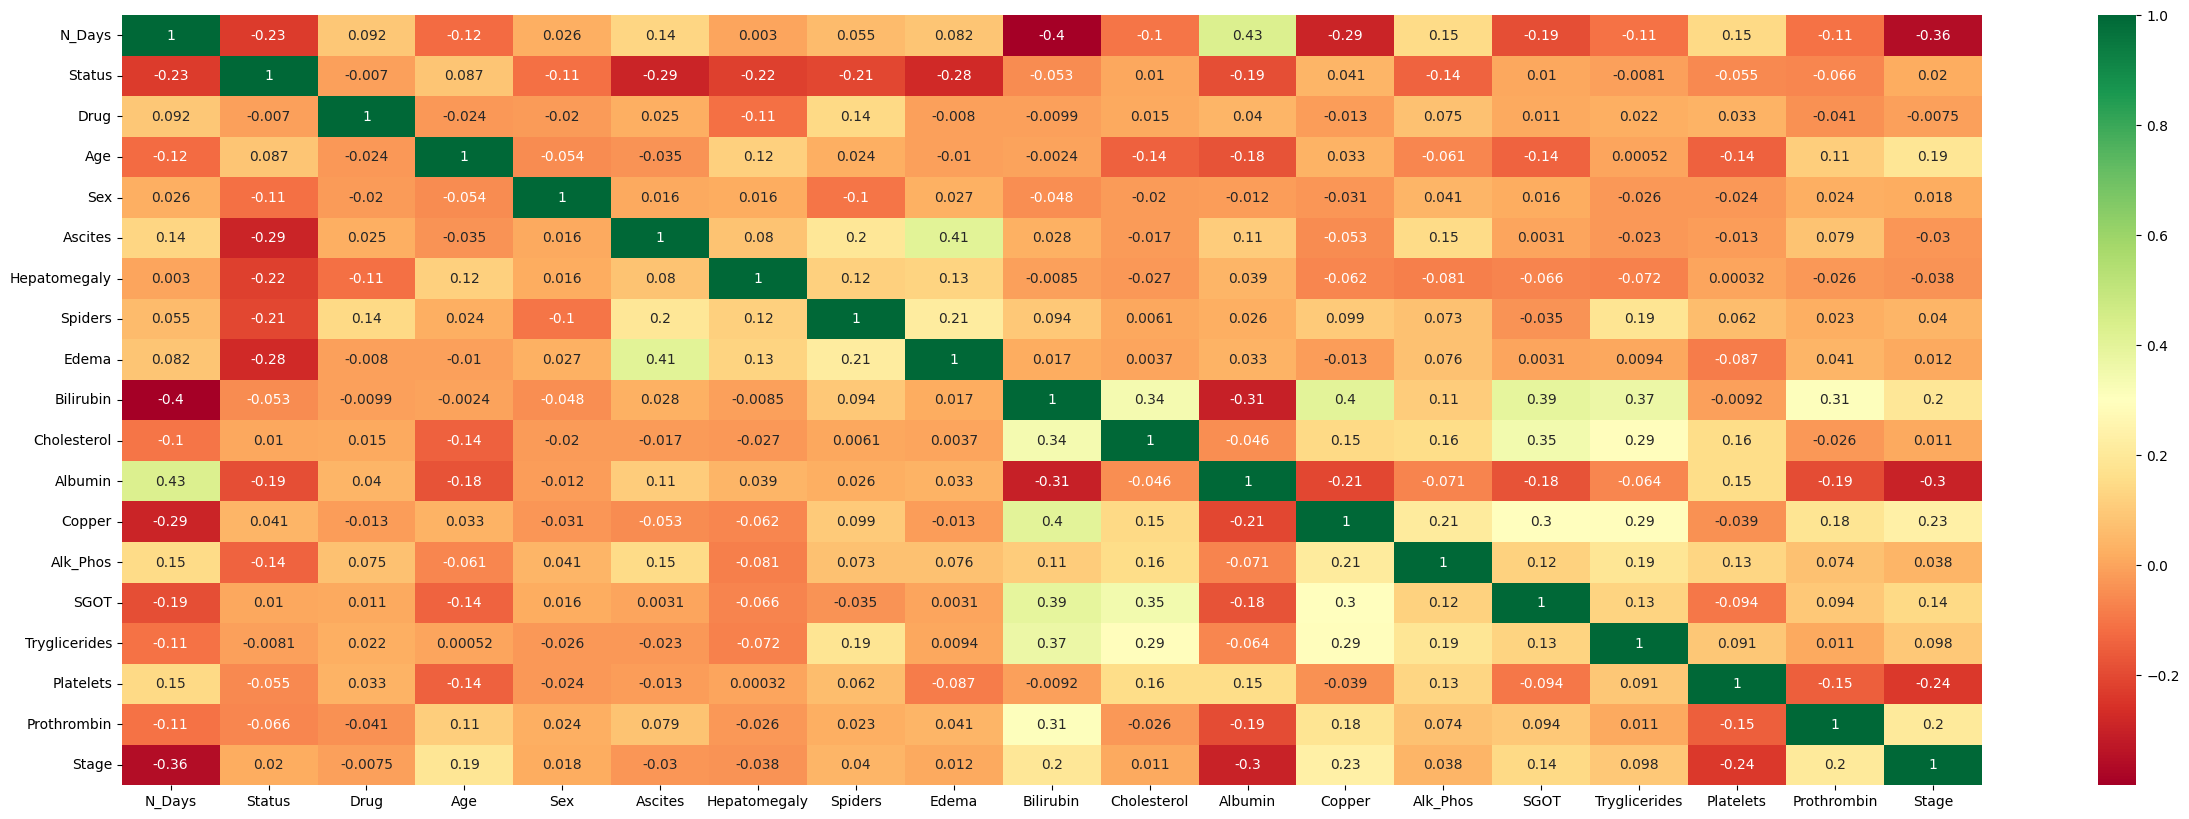

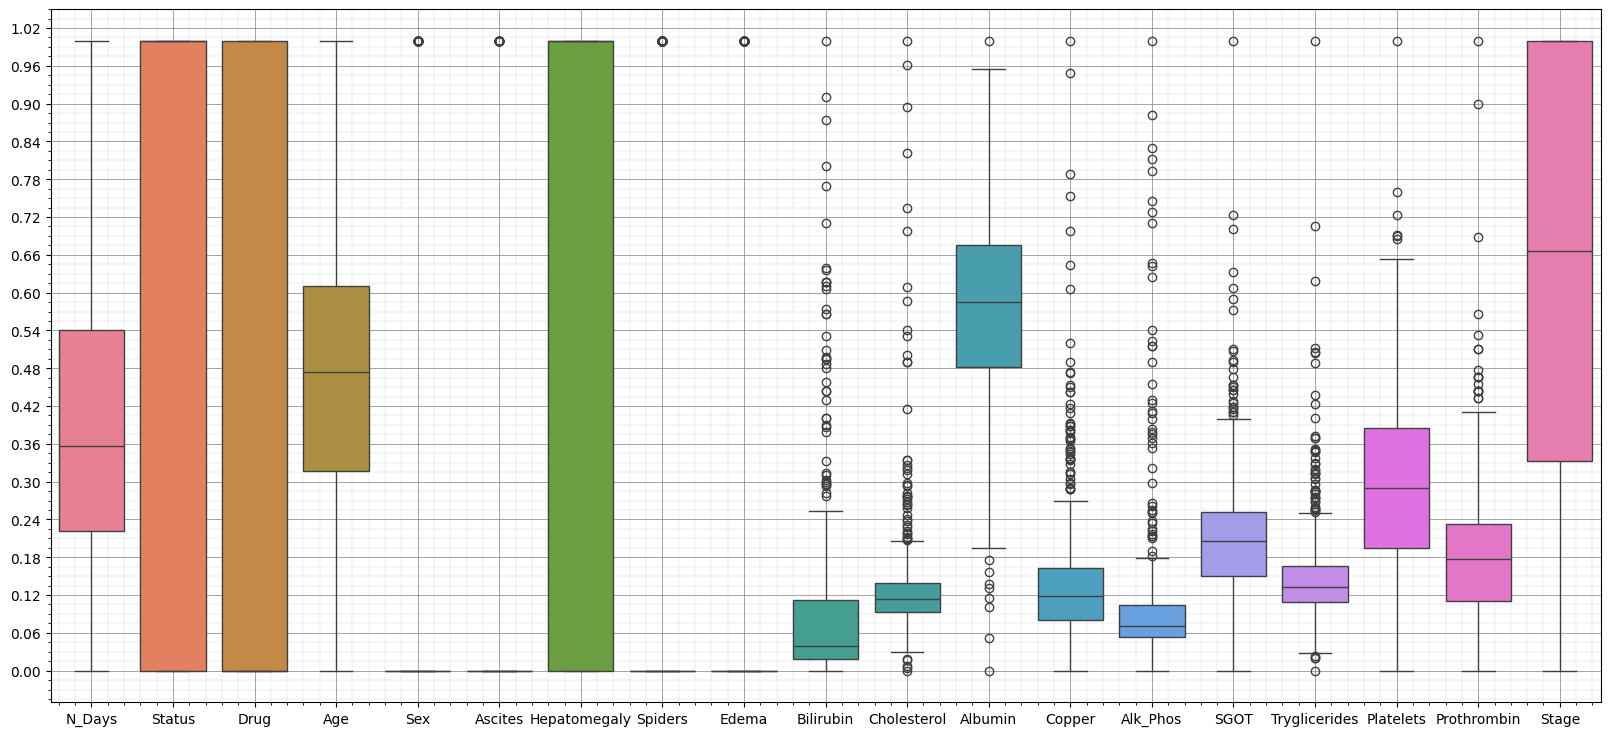

In [38]:
# Assuming 'data' is your DataFrame

# First, you need to identify numeric columns. Here's a way to do it:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Generate and plot correlation matrix
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Boxplot to visualize distributions and spot outliers
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

# Set major and minor ticks on both axes
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Set major x ticks to be more frequent
ax.yaxis.set_major_locator(plt.MaxNLocator(20))  # Set major y ticks to be more frequent

# Add gridlines and specify the grid for minor ticks as well
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.25)
plt.minorticks_on()  # Turn on minor ticks

plt.show()


In [39]:
# pair plot to check the colinearity
# sns.pairplot(data)

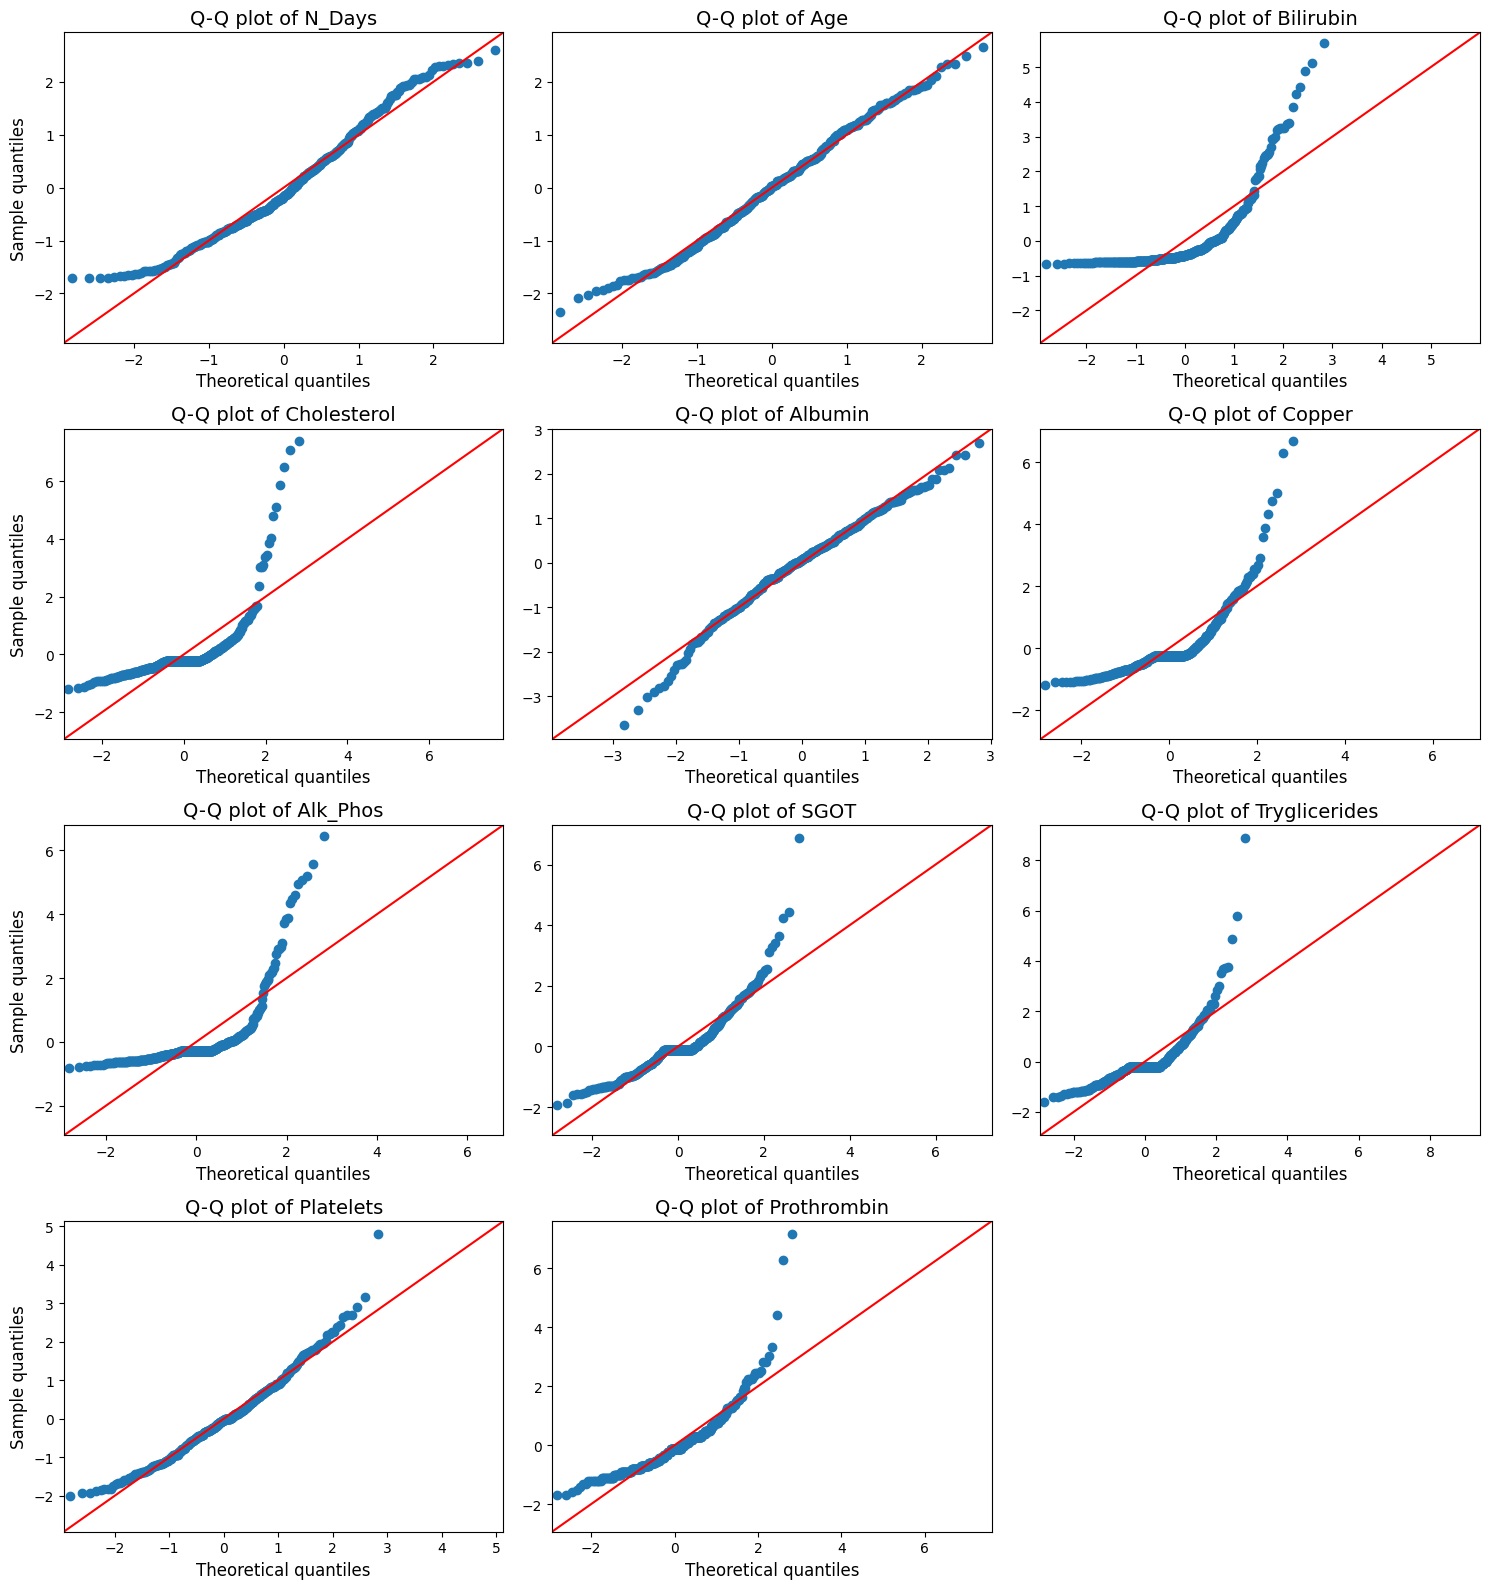

In [40]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# List of independent numerical variables
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Determine the number of rows needed for the subplots
num_vars = len(numerical_vars)
rows = 4
cols = (num_vars + rows - 1) // rows  # This ensures that we have enough columns

# Set up the matplotlib figure, adjust the size as needed
plt.figure(figsize=(cols * 5, rows * 4))  # Adjust figure size as needed

# Generate Q-Q plots for each numerical variable
for i, var in enumerate(numerical_vars):
    plt.subplot(rows, cols, i+1)  # rows, cols, index of subplot
    qqplot(data[var], line='45', fit=True, ax=plt.gca())
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Theoretical quantiles', fontsize=12)
    plt.ylabel('Sample quantiles' if i % cols == 0 else '', fontsize=12)  # Only label y-axis for the first column
    plt.title(f'Q-Q plot of {var}', fontsize=14)

plt.tight_layout()
plt.show()


Class Distribution:
1    257
0    161
Name: Status, dtype: int64

Class Proportions:
1    0.614833
0    0.385167
Name: Status, dtype: float64


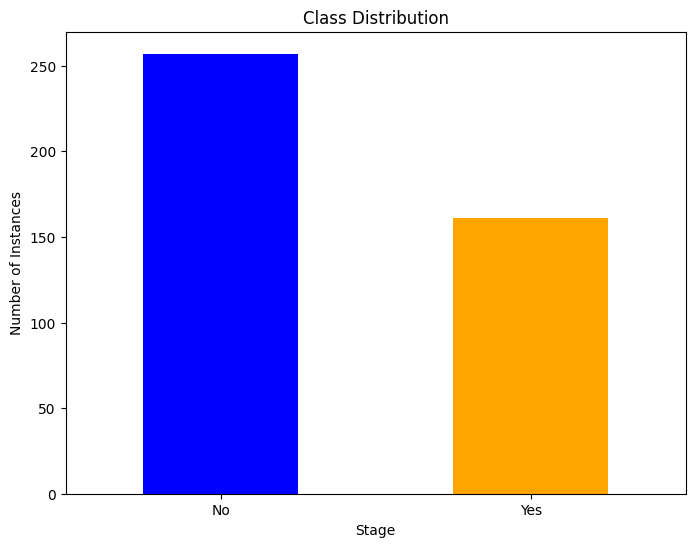

In [41]:
# Count the number of instances for each class
class_counts = data['Status'].value_counts()

# Calculate the proportion of each class label relative to the total number of instances
total_instances = len(data)
class_proportions = class_counts / total_instances

print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Stage')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

Class Distribution after SMOTE:
1    176
0    176
Name: Status, dtype: int64

Class Proportions after SMOTE:
1    0.5
0    0.5
Name: Status, dtype: float64


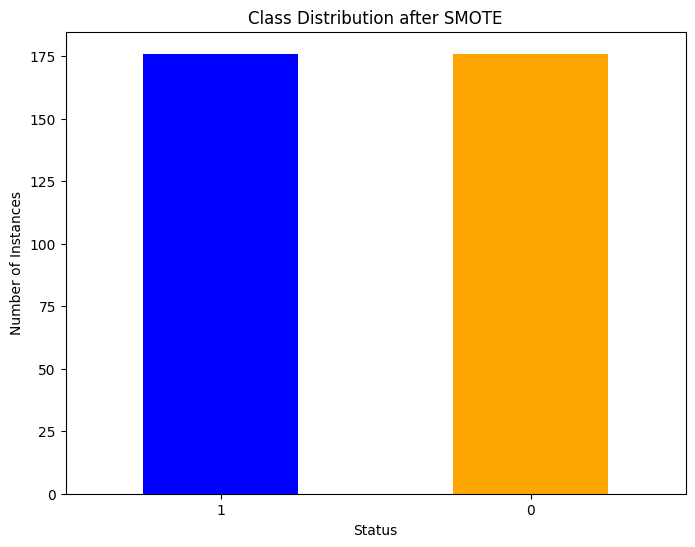

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes the columns of interest
# Replace 'feature_columns' with your actual list of feature column names
feature_columns = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
                   'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
                   'Tryglicerides', 'Platelets', 'Prothrombin']  # example feature columns

# Separate input features and target variable
X = data[feature_columns]
y = data['Status']

# Split your data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the SMOTE object
smote = SMOTE(random_state=1)

# Fit the SMOTE object to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count the number of instances for each class after SMOTE
class_counts_smote = pd.Series(y_train_smote).value_counts()

# Calculate the proportion of each class label relative to the total number of instances after SMOTE
total_instances_smote = len(y_train_smote)
class_proportions_smote = class_counts_smote / total_instances_smote

print("Class Distribution after SMOTE:")
print(class_counts_smote)
print("\nClass Proportions after SMOTE:")
print(class_proportions_smote)

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 6))
class_counts_smote.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution after SMOTE')
plt.xlabel('Status')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], class_counts_smote.index, rotation=0)  # Assuming the class labels are 0 and 1
plt.show()

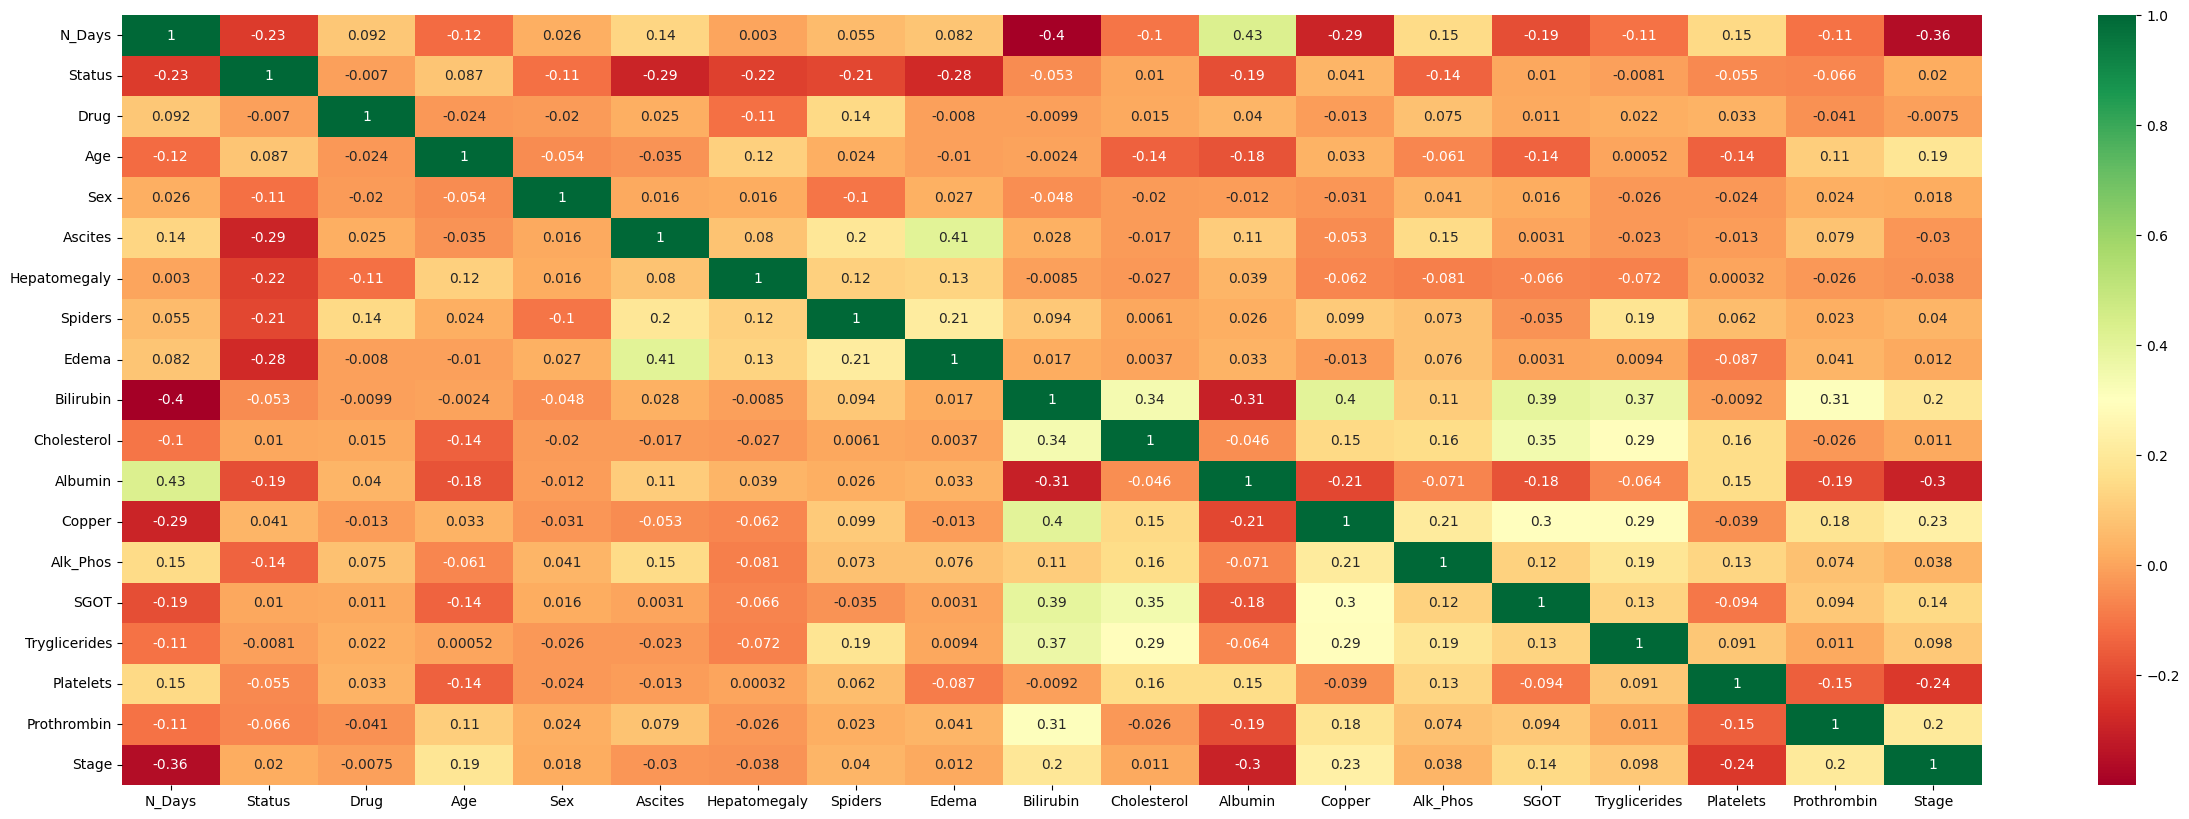

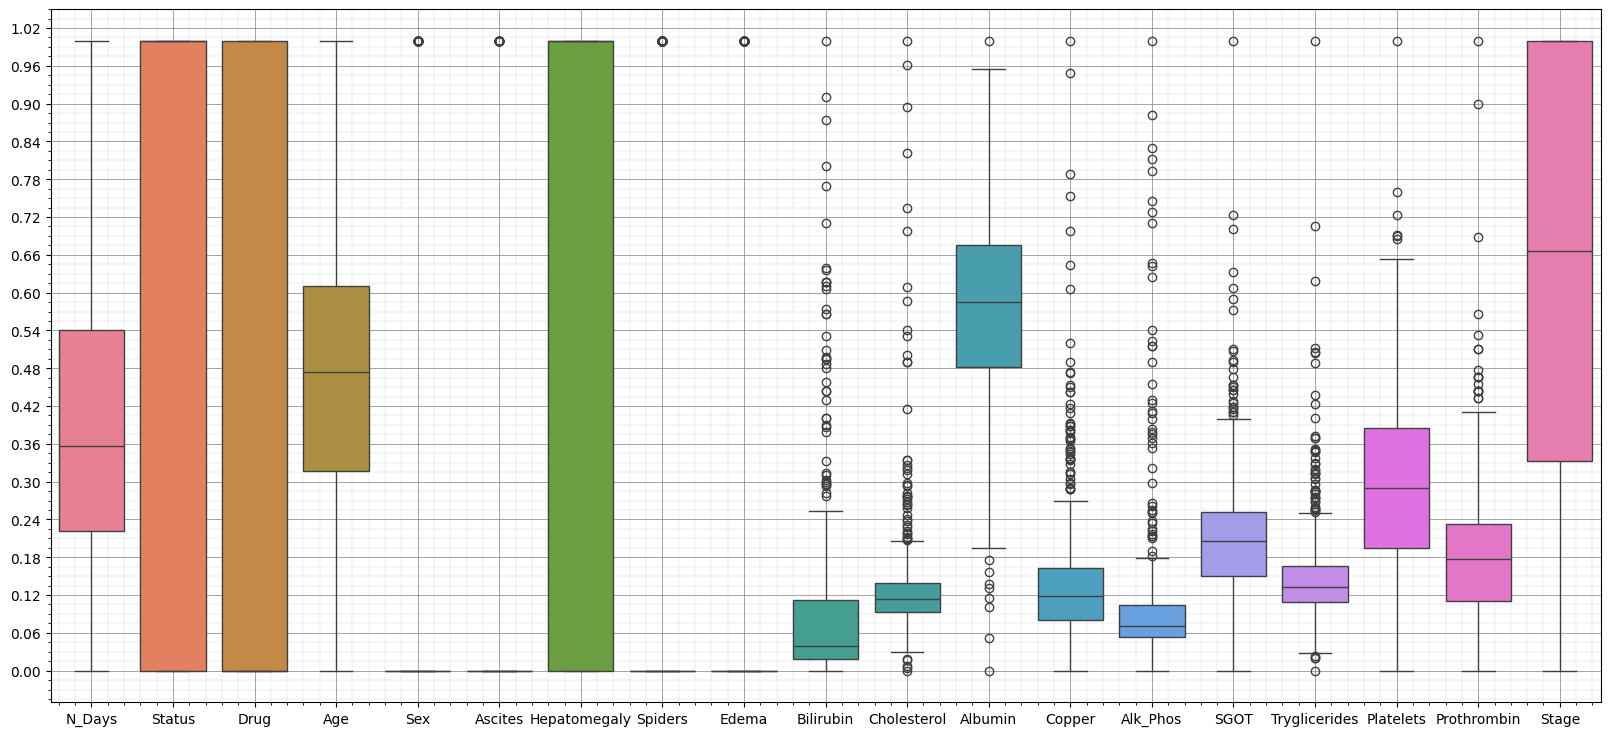

In [43]:
# Generate and plot correlation matrix
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

# Set major and minor ticks on both axes
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Set major x ticks to be more frequent
ax.yaxis.set_major_locator(plt.MaxNLocator(20))  # Set major y ticks to be more frequent

# Add gridlines and specify the grid for minor ticks as well
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.25)
plt.minorticks_on()  # Turn on minor ticks

plt.show()